# Week 3

Source for Boston Housing Dataset: https://lib.stat.cmu.edu/datasets/boston

Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.models import model_from_json

### Loading and Preprocessing data

Idea:
* Import Boston housing dataset as csv
* Convert to a numpy array
* Remove the first column (headers)

In [3]:
old_data = np.genfromtxt('housing.csv', delimiter=',', dtype=float, encoding='utf-8')

print(old_data)
#print(old_data.shape)

data = np.delete(old_data, 0, axis=0)
# print(data)
# print(data.shape)

[[       nan        nan        nan ...        nan        nan        nan]
 [6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


### Processing the data
Idea:
* Split the array into 4 arrays: x_train, y_train, x_test, y_test
* Give a parameter to the code to decide what % of data-points to train on


In [4]:
# Choose the # of instances to train on
Number_of_train = 300
np.random.shuffle(data)
x_train = data[0:Number_of_train, :-1]
y_train = data[0:Number_of_train, -1]
x_test = data[Number_of_train:, :-1]
y_test = data[Number_of_train:, -1]
# print(x_train)
print(x_train.shape)
# print()
# print(y_train)
# print(y_train.shape)
# print()
# print(x_test.shape)
# print(x_test)
# print()
# print(y_test)
# print(y_test.shape)
# print()

(300, 13)


### Neural Regression using Tensorflow

* Neural net, playing around with neurons
* Predicting MDV using all other paramaters

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, input_dim=13, activation='relu', use_bias=True),
    tf.keras.layers.Dense(40, activation='relu', use_bias=True),
    tf.keras.layers.Dense(1)  # Output layer with 1 node (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=300)

# Evaluate the model on test data
test_loss = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')

# Predict values using the trained model
y_pred = model.predict(x_test)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step - loss: 2800.1914
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1865.9263
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1172.3417
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 705.0635
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 443.3163
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 347.1295
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 363.7755
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 436.3729
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 515.9521
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 569.0066
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 579.1440
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 545.4509
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 477.0805
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 388.1552
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - 

In [46]:
model.fit(x_train, y_train, epochs=1000, batch_size=300)
test_loss = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')

# Predict values using the trained model


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.6849
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.6872
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.6922
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.6964
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.6967
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7083
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7059
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7175
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.7120
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.7096
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.6841
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.6634
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.6504
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.6568
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.6711
Epoc

In [ ]:
#model.save('my_model_others.keras')



See how good the regression is on the training data

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


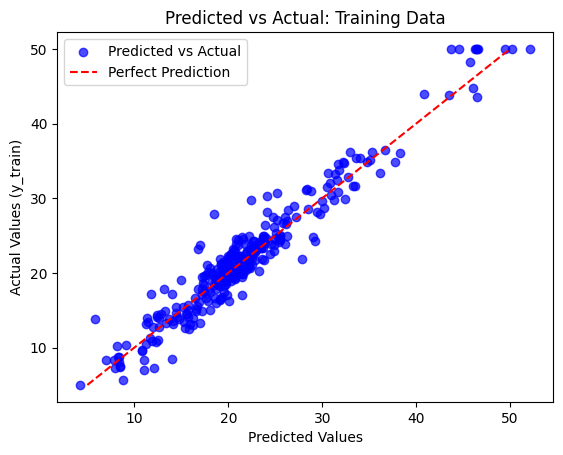

In [47]:
y_pred_train = model.predict(x_train)
# Plot predicted values vs actual y_train values
plt.scatter(y_pred_train, y_train, color='blue', label='Predicted vs Actual', alpha=0.7)

# Add a line for perfect predictions (i.e., where predicted = actual)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values (y_train)')
plt.title('Predicted vs Actual: Training Data')

# Show a legend
plt.legend()

# Show the plot
plt.show()


Testing on the rest

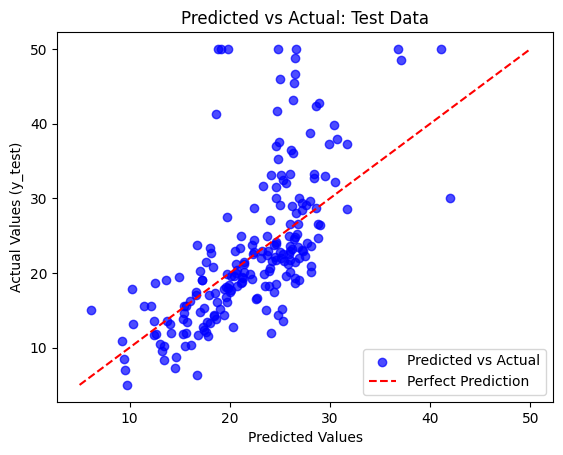

In [48]:

# Plot predicted values vs actual y_test values
plt.scatter(y_pred, y_test, color='blue', label='Predicted vs Actual', alpha=0.7)

# Add a line for perfect predictions (i.e., where predicted = actual)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values (y_test)')
plt.title('Predicted vs Actual: Test Data')

# Show a legend
plt.legend()

# Show the plot
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


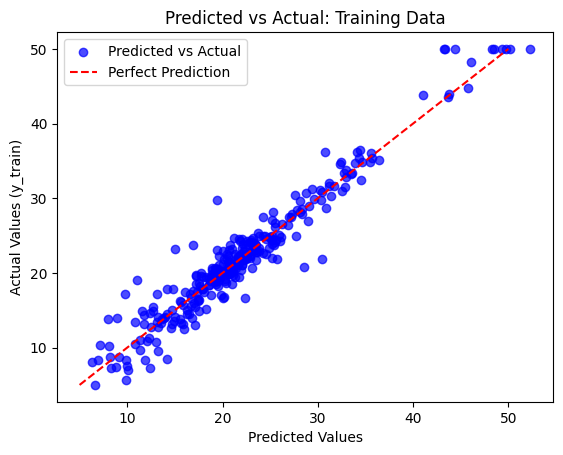

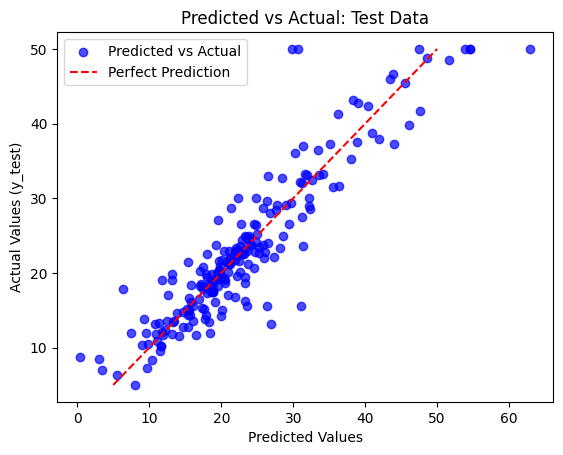

In [ ]:
###FINAL MODEL
model_2 = tf.keras.models.load_model('my_model.keras')
y_pred2 = model.predict(x_test)
y_pred_train2 = model.predict(x_train)

# Plot predicted values vs actual y_train values
plt.scatter(y_pred_train, y_train, color='blue', label='Predicted vs Actual', alpha=0.7)

# Add a line for perfect predictions (i.e., where predicted = actual)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values (y_train)')
plt.title('Predicted vs Actual: Training Data')

# Show a legend
plt.legend()

# Show the plot
plt.show()

plt.scatter(y_pred, y_test, color='blue', label='Predicted vs Actual', alpha=0.7)

# Add a line for perfect predictions (i.e., where predicted = actual)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values (y_test)')
plt.title('Predicted vs Actual: Test Data')

# Show a legend
plt.legend()

# Show the plot
plt.show()

Some conclusions
* Sigmoid and tanh dont work as they cant handle the range of values that a linear/polynomial function requires